# **EAD**

In [50]:
# 🔗 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# 📂
csv_path = '/content/drive/MyDrive/Phd Projects - CoLab & related/My Private Projects/fifa_players.csv'
import pandas as pd

# 📥 Load dataset
df = pd.read_csv(csv_path)
print("✅ Dataset loaded:", df.shape)

# === ✨ Basic EDA ===
# 📊 Show basic info
print("\n📄 Columns and types:")
print(df.dtypes)

print("\n🔎 Missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# 🧮 Number of players per position
df['positions'] = df['positions'].astype(str)
position_counts = df['positions'].value_counts().head(10)
print("\n⚽ Top 10 Most Common Position Combinations:")
print(position_counts)

# 🔍 Unique position breakdown (split comma-separated)
from collections import Counter
all_positions = sum([x.split(',') for x in df['positions']], [])
pos_counter = Counter([p.strip() for p in all_positions])
print("\n🧠 Top 10 Unique Positions:")
print(pos_counter.most_common(10))

# 🧯 Drop irrelevant columns for correlation
drop_cols = [
    'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro',
    'international_reputation(1-5)', 'skill_moves(1-5)', 'release_clause_euro',
    'national_team', 'national_rating', 'national_team_position',
     'full_name', 'birth_date', 'preferred_foot', 'body_type',
    'national_jersey_number'
]
df_skills = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')
df_skills = df_skills.dropna()





In [53]:
# 📦 Install dependencies
!pip install -q scikit-learn matplotlib seaborn xgboost

✅ Dataset shape: (17954, 51)
📊 First few rows:
            name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioni

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



🎯 Model Evaluation:
               precision    recall  f1-score   support

         CAM       0.57      0.53      0.55        49
          CB       0.91      1.00      0.95       413
         CDM       0.71      0.25      0.37        68
          CM       0.69      0.92      0.79       142
          GK       1.00      1.00      1.00       399
          LB       0.53      0.58      0.55       139
          LM       0.29      0.18      0.22        50
          LW       0.00      0.00      0.00        23
         LWB       0.00      0.00      0.00         2
          RB       0.50      0.43      0.46       119
          RM       0.30      0.33      0.32        51
          RW       0.00      0.00      0.00        19
         RWB       0.00      0.00      0.00         4
          ST       0.93      0.99      0.96       391

    accuracy                           0.82      1869
   macro avg       0.46      0.44      0.44      1869
weighted avg       0.79      0.82      0.80      1869



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.



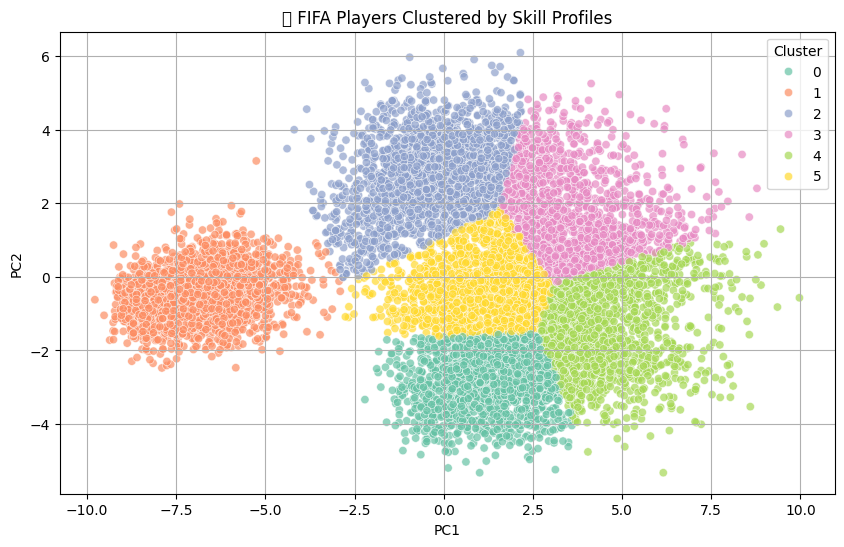

📋 Final Position Comparison Table:
           Player Original_Position      AI_Top_Positions  Adaptability_Score
4    K. Koulibaly                CB   CB, RB, LB, CDM, CF                   1
5     V. van Dijk                CB  CB, CDM, RB, CM, CAM                   1
7       S. Agüero                ST   ST, LW, CAM, RW, CF                   1
8        M. Neuer                GK   GK, CM, ST, CB, CDM                   1
9       E. Cavani                ST   ST, RM, CAM, CM, LW                   1
11    T. Courtois                GK  GK, CB, CAM, CDM, CF                   1
12  M. ter Stegen                GK  GK, CB, CAM, CDM, CF                   1
16    M. Škriniar                CB  CB, LB, CAM, CDM, CF                   1
17    Fernandinho               CDM   CM, LB, CDM, RB, CB                   0
18     G. Higuaín                ST   ST, RM, CAM, CF, CM                   1


In [54]:


# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# === ✨ EDA ===
print("✅ Dataset shape:", df.shape)
print("📊 First few rows:\n", df.head())

print("\n🧼 Missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# ⚽ Position statistics
df['positions'] = df['positions'].astype(str)
from collections import Counter
all_positions = sum([x.split(',') for x in df['positions']], [])
pos_counter = Counter([p.strip() for p in all_positions])
print("\n🧠 Top 10 Unique Positions:", pos_counter.most_common(10))

# === 🔥 Clean & Filter ===

drop_cols = [
    'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro',
    'international_reputation(1-5)', 'skill_moves(1-5)', 'release_clause_euro',
    'national_team', 'national_rating', 'national_team_position',
    'full_name', 'birth_date', 'preferred_foot', 'body_type', 'national_jersey_number'
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')
df = df.dropna()

# 🎯 Keep only single-position players for training
df['primary_position'] = df['positions'].apply(lambda x: x.strip() if ',' not in x else np.nan)
df = df[df['primary_position'].notnull()]

# === 🧪 Prepare Features ===
features = [col for col in df.columns if col not in ['positions', 'primary_position', 'name']]
X = df[features]
y = df['primary_position']

# ⚖️ Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Train Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("🎯 Model Evaluation:\n", classification_report(y_test, clf.predict(X_test)))

# 🔁 Predict Position-Fit
position_probs = clf.predict_proba(X_scaled)
position_labels = clf.classes_
position_prob_df = pd.DataFrame(position_probs, columns=position_labels, index=df.index)

# ➕ Add Adaptability Insights
df['top_positions'] = position_prob_df.apply(lambda x: x.sort_values(ascending=False).index[:5].tolist(), axis=1)
df['adaptability_score'] = (position_prob_df > 0.6).sum(axis=1)

# 🔷 PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = X_pca[:, 0], X_pca[:, 1]

# 🔶 Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

# 📊 PCA Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='Set2', alpha=0.7)
plt.title('🧠 FIFA Players Clustered by Skill Profiles')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 🧾 Final Comparison Table
comparison_df = pd.DataFrame({
    'Player': df['name'],
    'Original_Position': df['primary_position'],
    'AI_Top_Positions': df['top_positions'].apply(lambda x: ', '.join(x)),
    'Adaptability_Score': df['adaptability_score']
})

# Show final table
print("📋 Final Position Comparison Table:")
print(comparison_df.head(10))




In [55]:
position_prob_df.head()

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
4,0.00,0.96,0.00,0.0,0.00,0.00,0.01,0.0,0.00,0.0,0.03,0.00,0.00,0.0,0.00
5,0.00,0.91,0.05,0.0,0.01,0.00,0.00,0.0,0.00,0.0,0.03,0.00,0.00,0.0,0.00
7,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.13,0.0,0.00,0.00,0.01,0.0,0.82
8,0.00,0.01,0.00,0.0,0.02,0.95,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.02
9,0.02,0.00,0.00,0.0,0.01,0.00,0.00,0.0,0.01,0.0,0.00,0.02,0.00,0.0,0.94


In [56]:
df['top_positions']

,top_positions
4,"[CB, RB, LB, CDM, CF]"
5,"[CB, CDM, RB, CM, CAM]"
7,"[ST, LW, CAM, RW, CF]"
8,"[GK, CM, ST, CB, CDM]"
9,"[ST, RM, CAM, CM, LW]"
...,...
17947,"[CB, CDM, RB, LB, CM]"
17948,"[CAM, LM, RM, RW, LW]"
17950,"[LB, CB, RB, CDM, CF]"
17951,"[GK, CB, CAM, CDM, CF]"


In [57]:
comparison_df.to_csv('comparison_table.csv', index=False)


<ipython-input-58-16e1f916c542>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




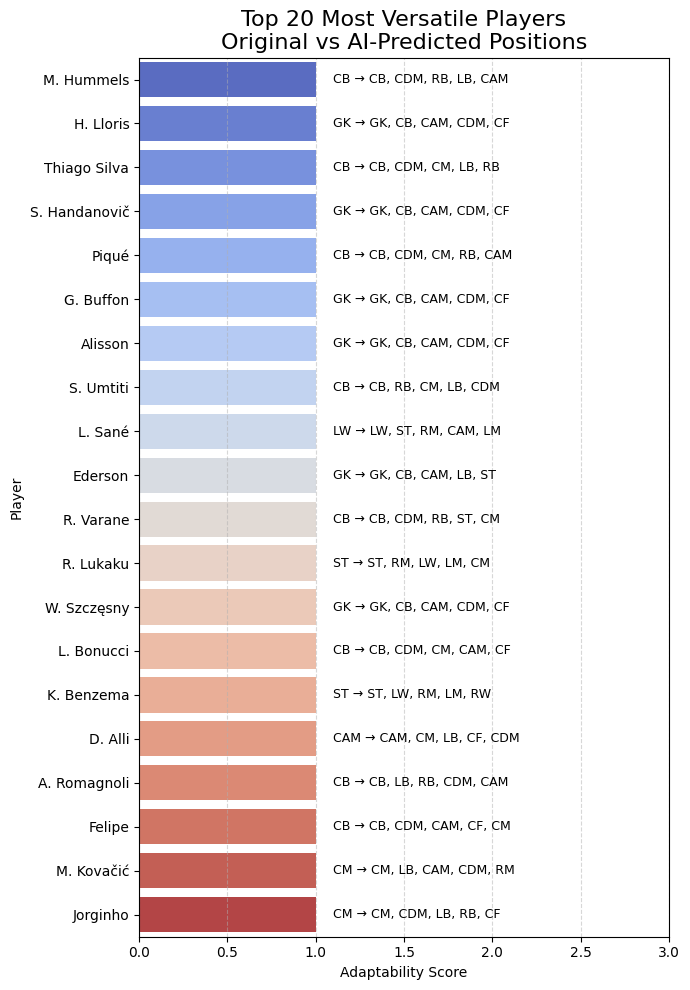

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Clean copy
top20 = comparison_df.sort_values('Adaptability_Score', ascending=False).head(20).copy()

# 🧩 Combine original and AI-predicted positions
top20['Position_Comparison'] = top20.apply(
    lambda row: f"{row['Original_Position']} → {row['AI_Top_Positions']}", axis=1
)

# 🎨 Plot
plt.figure(figsize=(7, 10))
barplot = sns.barplot(
    data=top20,
    y='Player',
    x='Adaptability_Score',
    palette='coolwarm'
)

# 🏷️ Predicted positions
for i, (score, text) in enumerate(zip(top20['Adaptability_Score'], top20['Position_Comparison'])):
    plt.text(score + 0.1, i, text, va='center', fontsize=9, color='black')

plt.title('Top 20 Most Versatile Players\nOriginal vs AI-Predicted Positions', fontsize=16)
plt.xlabel('Adaptability Score')
plt.ylabel('Player')
plt.xlim(0, top20['Adaptability_Score'].max() + 2)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
